# INM_Eventos

La fia

In [1]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
from unidecode import unidecode
import re

import matplotlib.pyplot as plt
import squarify
import seaborn as sns
import matplotlib as mpl

import plotly.express as px
import plotly.graph_objects as go

## Procesamiento 






### Eventos de extranjeros presentados ante la autoridad migratoria, según entidad federativa
Procesamos las tablas estadisticas con datos sobre eventos de migrantes irregulares registrados por el INM por entidad federativa.

Los datos seleccionados se refieren unicamente a los eventos en los que migrantes fueron  ...

    2001 - 2012 la información incluye eventos de extranjeros en situación migratoria irregular a los que el Instituto Nacional de Migración (INM) les inició un procedimiento administrativo de aseguramiento y a los centroamericanos acogidos al “Memorándum de entendimiento entre los gobiernos de los Estados Unidos Mexicanos, de la República de El Salvador, de la República de Guatemala, de la República de Honduras y de la República de Nicaragua, para la repatriación digna, ordenada, ágil y segura de nacionales centroamericanos migrantes vía terrestre” suscrito el 5 de mayo de 2006 y su anexo del 26 de abril de 2007.

    2013 - 2020 la información incluye los eventos de migrantes en situación migratoria irregular a los que se les inició un procedimiento administrativo de presentación por no acreditar su situación migratoria, según lo previsto en los arts. 99, 112 y 113 de la Ley de Migración y del art. 222 de su Reglamento.

    2021 - 2023 la información hace referencia a los eventos de extranjeros en situación migratoria irregular a los que se les inicio un Procedimiento Administrativo Migratorio (PAM) ante el Instituto Nacional de Migración (INM) por no acreditar su situación migratoria, según lo previsto en los arts. 99, 100, 101 y 113 de la Ley de Migración y del art. 222 de su Reglamento 

Y a los que fueron canalizados por esta misma autoridad a los albergues de la red DIF, con PAM iniciado; según lo previsto en los art. 112 y 113 de la Ley de Migración y del art. 222 de su Reglamento, así como de los arts. 89, 94 de la Ley General de los Derechos de Niñas, Niños y Adolescentes.(Excluidos en estas BD para mantener comparabilidad estadistica)

El nombre de datos en el tiempo:

2002 - 2006 "EVENTOS DE ASEGURAMIENTO EN MÉXICO SEGÚN DELEGACIÓN REGIONAL"

2007 - 2012  "Eventos de extranjeros alojados en estaciones migratorias, según entidad federativa"

2013 - 2023 "Eventos de extranjeros presentados ante la autoridad migratoria, según entidad federativa"




##### Cargar BD

In [2]:
bd_tw = pd.read_excel("/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. Datos/INM/Total_De_Eventos/31.2011_Sorted.xlsx")

###### Guardar BD

In [ ]:
#bd_tw.to_excel("/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. Datos/INM/Total_De_Eventos/31.2011_Sorted.xlsx", index=False)


In [3]:
#Llenamos valores NaN
bd_tw.fillna(0, inplace=True)

#Convertimos cantidades a int
columns_to_convert = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Total']
for col in columns_to_convert:
    bd_tw[col] = bd_tw[col].astype(int, errors='ignore')



In [4]:
# Convertir la columna 'Año' a un tipo numérico
bd_tw['Año'] = bd_tw['Año'].astype(int)

# Ordenar el DataFrame por 'Año'
bd_tw = bd_tw.sort_values(by=['Año'], kind='mergesort')


In [5]:
bd_tw.head(3)


,Entidad federativa,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total,Año
0,Total general,14061,17965,20613,15770,17368,13947,13283,12731,9740,5423,4727,4902,150530,2001
1,Aguascalientes,2,1,3,5,3,7,3,7,2,3,0,8,44,2001
2,Baja California,155,43,95,107,81,138,141,294,105,97,45,57,1358,2001


In [ ]:
#print(bd_tw['Entidad federativa'].unique())


### Eventos de personas en situación migratoria irregular en México, según continente y país de nacionalidad, 2023

In [6]:
bd_tw_nacionalidad = pd.read_excel("/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. Datos/INM/Total_De_Eventos_Nacionalidad/cuadro3.2(nacionalidad).xlsx")

In [ ]:
#bd_tw_nacionalidad.to_excel("/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. Datos/INM/Total_De_Eventos_Nacionalidad/cuadro3.2(nacionalidad).xlsx", index=False)


# Eliminar filas donde "Continente/ país de nacionalidad" es NaN
bd_tw_nacionalidad = bd_tw_nacionalidad.dropna(subset=['Continente/ país de nacionalidad'])

# Eliminar acentos
bd_tw_nacionalidad['Continente/ país de nacionalidad'] = bd_tw_nacionalidad['Continente/ país de nacionalidad'].apply(unidecode)

# Eliminar signos de puntuación que no sean letras
bd_tw_nacionalidad['Continente/ país de nacionalidad'] = bd_tw_nacionalidad['Continente/ país de nacionalidad'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Cambiar a letra mayúscula la primera letra de cada palabra
bd_tw_nacionalidad['Continente/ país de nacionalidad'] = bd_tw_nacionalidad['Continente/ país de nacionalidad'].apply(lambda x: x.title())

#eliminar espacios en blanco
bd_tw_nacionalidad['Continente/ país de nacionalidad'] = bd_tw_nacionalidad['Continente/ país de nacionalidad'].str.strip()


# Diccionario de correciones
correcciones = {
    'Dominicana Rep': 'República Dominicana',
    'Dominicana Republica': 'República Dominicana',
    'Checa Rep': 'República Checa',
    'Paises Bajos Holanda': 'Países Bajos',
    'Holanda': 'Países Bajos',
    'Mianmar Birmania': 'Myanmar',
    'Centroafricana Rep': 'República Centroafricana',
    'Congo Rep Dem': 'República Democrática del Congo',
    'Costa De Marfil': 'Costa de Marfil',
    'Guinea Bissau': 'Guinea-Bisáu',
    'Santo Tome Y Principe': 'Santo Tomé y Príncipe',
    'Sudafrica': 'Sudáfrica',
    'Nueva Zelandia': 'Nueva Zelanda',
    'Aruba P Bajos': 'Aruba',
    'Micronesia Rep': 'Micronesia',
    'Bosniaherzegovina': 'Bosnia y Herzegovina',
    'Corea Rpd Norte': 'Corea del Norte',
    'Congo Rep': 'República del Congo',
    'Saharaui Rep Arabe': 'Sahara Occidental',
    'Dominica Comonwealth': 'Dominica',
    'Dominica Commonwealth': 'Dominica',
    'Turcos Y Caicos Islas R Unido': 'Islas Turcas y Caicos',
    'Micronesia Rep Eua': 'Micronesia',
    'China Rep Pop': 'China',
    'Kazajstan': 'Kazajistán',
    'Kazajistan': 'Kazajistán',
    'Rwanda': 'Ruanda',
    'Estados Unidos de América': 'Estados Unidos',
    'Bahamas Commonwealth': 'Bahamas',
    'Martinica Terr Ultram Francia': 'Martinica',
    'Guayana Francesa': 'Guayana Francesa',
    'Paises Bajos': 'Países Bajos',
    'Hong Kong China': 'Hong Kong',
    'Corea Rep Sur': 'Corea del Sur',
    'Corea Del Sur': 'Corea del Sur',
    'Zimbabue': 'Zimbabwe'
}

# Corregir los nombres de los países en la columna específica
bd_tw_nacionalidad['Continente/ país de nacionalidad'] = bd_tw_nacionalidad['Continente/ país de nacionalidad'].replace(correcciones)


In [7]:
##Revisamos Manualmente
#print(bd_tw_nacionalidad['Continente/ país de nacionalidad'].unique())

In [8]:
bd_tw_nacionalidad.tail(6)

,Continente/ país de nacionalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total,Año
2075,Belice,12,13,14,7,9.0,4,11,12,9,9,8,4.0,112,2001
2076,China,18,15,16,12,0.0,10,5,5,6,9,2,9.0,107,2001
2077,Venezuela,0,1,6,0,7.0,12,11,13,10,0,0,2.0,62,2001
2078,Chile,5,3,12,11,2.0,4,2,2,4,0,3,2.0,50,2001
2079,Panama,2,5,4,4,6.0,5,0,5,2,1,5,1.0,40,2001
2080,Otros,98,70,55,71,54.0,86,107,93,72,72,50,41.0,869,2001


### Eventos Presentados/Canalizados

In [9]:
EventosPresentados = pd.read_excel("/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. Datos/INM/Total_De_Eventos/EventosPresentados.xlsx")

In [10]:
EventosCanalizados = pd.read_excel("/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. Datos/INM/Total_De_Eventos/EventosCanalizados.xlsx")

#### Convertimos el dataframe para utilizar temporalidad en los datos

In [11]:
# Derretir el DataFrame para que cada fila represente un único mes y año para un país
EventosPresentados_derr = pd.melt(EventosPresentados, id_vars=['Total general', 'Año'], 
                    value_vars=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                                'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], 
                    var_name='Mes', value_name='Total')

# Mapear los nombres de los meses en español a inglés
meses_ingles = {'Enero': 'January', 'Febrero': 'February', 'Marzo': 'March', 'Abril': 'April', 
                'Mayo': 'May', 'Junio': 'June', 'Julio': 'July', 'Agosto': 'August', 
                'Septiembre': 'September', 'Octubre': 'October', 'Noviembre': 'November', 'Diciembre': 'December'}
EventosPresentados_derr['Mes'] = EventosPresentados_derr['Mes'].map(meses_ingles)

# Crear una nueva columna 'Fecha' que combine 'Año' y 'Mes'
EventosPresentados_derr['Fecha'] = EventosPresentados_derr['Mes'].astype(str) + '-' + EventosPresentados_derr['Año'].astype(str)
EventosPresentados_derr['Fecha'] = pd.to_datetime(EventosPresentados_derr['Fecha'], format='%B-%Y')

# Ordenar df_melted por 'Fecha'
EventosPresentados_derr = EventosPresentados_derr.sort_values('Fecha')

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_2379/510998868.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  EventosPresentados_derr = pd.melt(EventosPresentados, id_vars=['Total general', 'Año'],


In [12]:
# Derretir el DataFrame para que cada fila represente un único mes y año para un país
EventosCanalizados_derr = pd.melt(EventosCanalizados, id_vars=['Total general', 'Año'], 
                    value_vars=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                                'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], 
                    var_name='Mes', value_name='Total')

# Mapear los nombres de los meses en español a inglés
meses_ingles = {'Enero': 'January', 'Febrero': 'February', 'Marzo': 'March', 'Abril': 'April', 
                'Mayo': 'May', 'Junio': 'June', 'Julio': 'July', 'Agosto': 'August', 
                'Septiembre': 'September', 'Octubre': 'October', 'Noviembre': 'November', 'Diciembre': 'December'}
EventosCanalizados_derr['Mes'] = EventosCanalizados_derr['Mes'].map(meses_ingles)

# Crear una nueva columna 'Fecha' que combine 'Año' y 'Mes'
EventosCanalizados_derr['Fecha'] = EventosCanalizados_derr['Mes'].astype(str) + '-' + EventosCanalizados_derr['Año'].astype(str)
EventosCanalizados_derr['Fecha'] = pd.to_datetime(EventosCanalizados_derr['Fecha'], format='%B-%Y')

# Ordenar df_melted por 'Fecha'
EventosCanalizados_derr = EventosCanalizados_derr.sort_values('Fecha')

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_2379/246433892.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  EventosCanalizados_derr = pd.melt(EventosCanalizados, id_vars=['Total general', 'Año'],


In [13]:
EventosPresentados_derr.head(2)

,Total general,Año,Mes,Total,Fecha
2,Total general,2021,January,9001,2021-01-01
5,Total general,2021,February,10575,2021-02-01


In [14]:
EventosCanalizados_derr.tail(10)

,Total general,Año,Mes,Total,Fecha
6,Total general,2023,March,12990,2023-03-01
9,Total general,2023,April,6870,2023-04-01
12,Total general,2023,May,12239,2023-05-01
15,Total general,2023,June,15533,2023-06-01
18,Total general,2023,July,18509,2023-07-01
21,Total general,2023,August,0,2023-08-01
24,Total general,2023,September,0,2023-09-01
27,Total general,2023,October,0,2023-10-01
30,Total general,2023,November,0,2023-11-01
33,Total general,2023,December,0,2023-12-01


## Visualizaciones

#### 1. Eventos Presentados/Canalizados

    -Grafica de Area encimada

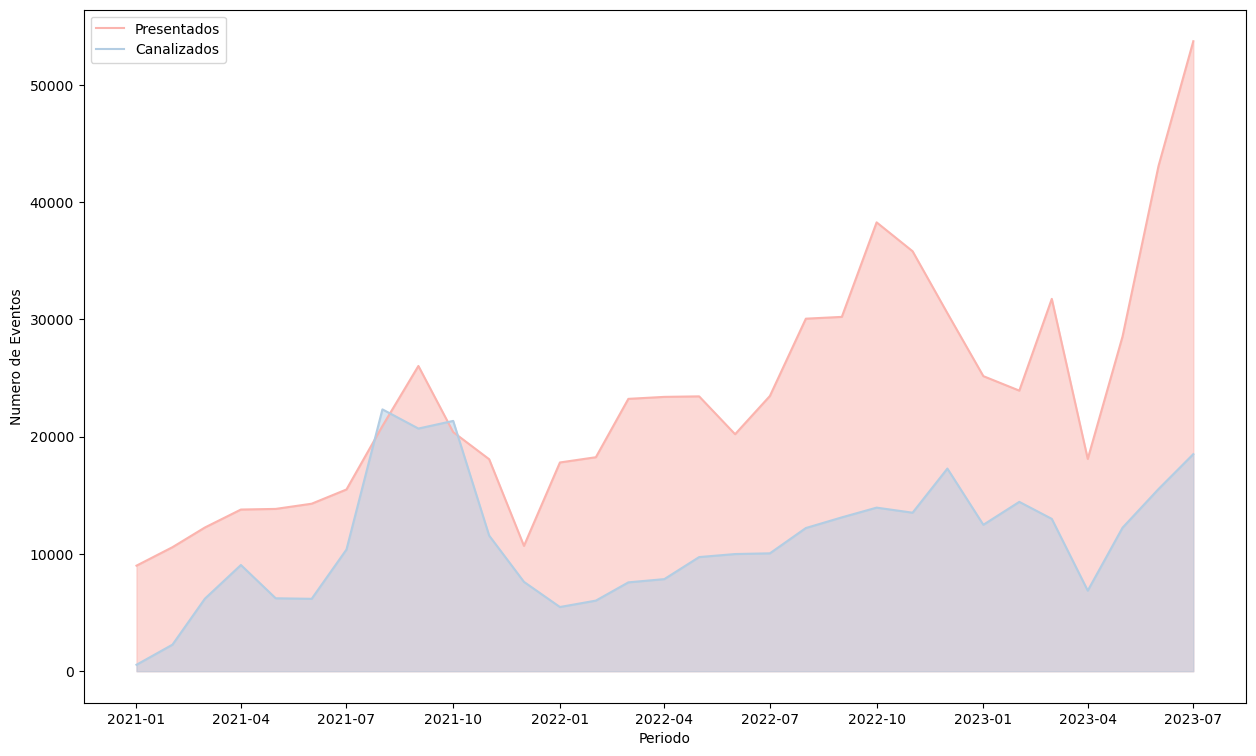

In [17]:
# Filtrar los DataFrames para excluir meses con Total igual a 0
EventosPresentados_derr = EventosPresentados_derr[EventosPresentados_derr['Total'] != 0]
EventosCanalizados_derr = EventosCanalizados_derr[EventosCanalizados_derr['Total'] != 0]

# Crear una figura y un eje
plt.figure(figsize=(15, 9))

# Definir la paleta de colores
colores = sns.color_palette("Pastel1", n_colors=2)

# Graficar las líneas y el área para 'EventosPresentados'
sns.lineplot(x='Fecha', y='Total', data=EventosPresentados_derr, label='Presentados', color=colores[0])
plt.fill_between(EventosPresentados_derr['Fecha'], EventosPresentados_derr['Total'], color=colores[0], alpha=0.5)

# Graficar las líneas y el área para 'EventosCanalizados'
sns.lineplot(x='Fecha', y='Total', data=EventosCanalizados_derr, label='Canalizados', color=colores[1])
plt.fill_between(EventosCanalizados_derr['Fecha'], EventosCanalizados_derr['Total'], color=colores[1], alpha=0.5)

# Añadir títulos y etiquetas
#plt.title('Comparación de Eventos Presentados y Eventos Canalizados por Año')
plt.xlabel('Periodo')
plt.ylabel('Numero de Eventos')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

#Titulo: Migrantes Irregulares Detenidos por el INM.

#### 1. Total de Eventos por Año

     -LinePlot

In [ ]:
# Filtrar el df con los resultados a nivel federación ('Total General') por año
df_total_general = bd_tw[bd_tw['Entidad federativa'] == 'Total general']
df_total_general.head(5)

In [ ]:
# Configuración de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(20, 12))

# Gráfico de líneas para los totales anuales
sns.lineplot(x='Año', y='Total', data=df_total_general, marker='o', linewidth=2.5, color='b')

# Añadir títulos y etiquetas
plt.title('Valores de la columna "Total" para la "Entidad Federativa: Total General" por cada año', fontsize=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Total Anual', fontsize=16)

# Asegurarse de que todas las etiquetas de los años se muestren en el eje x
plt.xticks(df_total_general['Año'].unique(), fontsize=14)
plt.yticks(fontsize=14)

# Agregar un fondo de cuadrícula con líneas punteadas grises
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Mostrar el gráfico
plt.show()

        ## Agregamos Eventos: "Criterios INM"

In [ ]:
# Configuración de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico
fig, ax = plt.subplots(figsize=(20, 12))

# Gráfico de líneas para los totales anuales
sns.lineplot(x='Año', y='Total', data=df_total_general, marker='o', linewidth=2.5, color='black', ax=ax, markersize=10)

# Añadir títulos y etiquetas
ax.set_ylabel('Total de eventos', fontsize=16)
ax.set_xlabel('')

# Asegurarse de que todas las etiquetas de los años se muestren en el eje x
ax.set_xticks(df_total_general['Año'].unique())
ax.set_xticklabels(df_total_general['Año'].unique(), fontsize=14)
plt.yticks(fontsize=14)

# Agregar un fondo de cuadrícula con líneas punteadas grises
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Definir los eventos y sus colores (usando la paleta Pastel1)
event_colors = {
    'Criterios 2001-2012': sns.color_palette("Pastel1")[0],
    'Criterios 2013-2020': sns.color_palette("Pastel1")[1],
    'Criterios 2021-2023': sns.color_palette("Pastel1")[2]
}

# Dibujar los eventos en el gráfico
ax.axvspan(2001, 2013, facecolor=event_colors['Criterios 2001-2012'], alpha=0.1)
ax.axvspan(2013, 2021, facecolor=event_colors['Criterios 2013-2020'], alpha=0.1)
ax.axvspan(2021, 2023, facecolor=event_colors['Criterios 2021-2023'], alpha=0.1)

# Crear una leyenda para los eventos
handles = [plt.Rectangle((0, 0), 1, 1, facecolor=color, alpha=0.4) for color in event_colors.values()]
labels = list(event_colors.keys())
ax.legend(handles, labels, title='Eventos', loc='upper left', fontsize=14)

# Ajustar los límites del eje x para que comiencen en el primer año de tus datos
primer_año = df_total_general['Año'].min()
ultimo_año = df_total_general['Año'].max()
ax.set_xlim(primer_año, ultimo_año)

# Mostrar el gráfico
plt.show()


In [ ]:
#Hacer la grafica aplanada al mes, utilizar el promedio anual para el punto intermedio

In [ ]:
# Configuración de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico
fig, ax = plt.subplots(figsize=(20, 12))

# Definir los eventos y sus colores (usando la paleta Pastel1)
event_colors = {
    'Criterios 2001-2012': sns.color_palette("Pastel1")[0],
    'Criterios 2013-2020': sns.color_palette("Pastel1")[1],
    'Criterios 2021-2023': sns.color_palette("Pastel1")[2]
}

# Crear una lista de colores para cada barra en el gráfico
bar_colors = df_total_general['Año'].apply(
    lambda x: event_colors['Criterios 2001-2012'] if x <= 2012 else (
              event_colors['Criterios 2013-2020'] if x <= 2020 else 
              event_colors['Criterios 2021-2023'])
)

# Gráfico de barras para los totales anuales con colores personalizados
sns.barplot(x='Año', y='Total', data=df_total_general, palette=bar_colors, ax=ax)

# Añadir títulos y etiquetas
#'Detenciones o aseguramientos de migrantes irregulares realizados por el INM'
ax.set_ylabel('Numero de eventos', fontsize=16)
ax.set_xlabel('')

# Crear una leyenda para los eventos
handles = [plt.Rectangle((0, 0), 1, 1, facecolor=color, alpha=0.4) for color in event_colors.values()]
labels = list(event_colors.keys())
ax.legend(handles, labels, title='Eventos', loc='upper left', fontsize=14)

# Añadir anotación al pie del gráfico
ax.text(0.9, -0.1, '* Datos de 2023 corresponden al periodo de Enero a Julio.',
        transform=ax.transAxes, ha="center", fontsize=12, color="black")


# Mostrar el gráfico
plt.show()


#### 2. Total de eventos por mes/año , small numbers.

    Histograma + LinePlot
    
    (PENDIENTE)
    -Tiene algunas dificultades para graficarse, las lineas temporales no son compatibles en las diferentes df

In [ ]:
# Crear un nuevo DataFrame para almacenar los datos "aplanados"
df_flattened = pd.DataFrame(columns=['Año-Mes', 'Total'])

# Aplanar el DataFrame original
for index, row in df_total_general.iterrows():
    for mes in ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']:
        año = row['Año']
        total = row[mes]
        df_flattened = df_flattened.append({'Año-Mes': f"{año}-{mes}", 'Total': total}, ignore_index=True)

# Agregar una nueva columna que contenga solo el año
#df_flattened['Año'] = df_flattened['Año-Mes'].apply(lambda x: x.split('-')[0])

# Separar el año y el mes en dos columnas diferentes
df_flattened['Año'] = df_flattened['Año-Mes'].apply(lambda x: x.split('-')[0])
df_flattened['Mes'] = df_flattened['Año-Mes'].apply(lambda x: x.split('-')[1])

#Cambiamos tipo de datos
df_flattened['Total'] = df_flattened['Total'].astype(int)
df_flattened['Año'] = df_flattened['Año'].astype(int)


In [ ]:
df_flattened.head()

In [ ]:
# Configuración de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(20, 12))

# Gráfico de líneas para los totales mensuales
sns.lineplot(x='Año-Mes', y='Total', data=df_flattened, color='b', linewidth=2.5)

# Añadir títulos y etiquetas
plt.title('Valores de la columna "Total" a lo largo del tiempo', fontsize=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Total Mensual', fontsize=16, color='b')

# Asegurarse de que todas las etiquetas de los años se muestren en el eje x
unique_years = df_flattened['Año'].unique()
year_indices = [df_flattened[df_flattened['Año'] == year].index[0] for year in unique_years]
plt.xticks(year_indices, unique_years, fontsize=14)
plt.yticks(fontsize=14)

# Agregar un fondo de cuadrícula con líneas punteadas grises
plt.grid(True, linestyle='--', linewidth=0.5, color='black')

# Mostrar el gráfico
plt.show()

In [ ]:
#Histograma "barras" totales por cada año

# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(20, 12))

# Grafico principal "Histograma"
ax1.bar(df_total_general['Año'].astype(str), df_total_general['Total'], alpha=0.6, color='g')


# Añadir títulos y etiquetas
ax1.set_title('Valores de la columna "Total" para la "Entidad Federativa: Total General"')
ax1.set_xlabel('Año')
#ax1.set_ylabel('Total Mensual', color='b')
ax1.set_ylabel('Total Anual', color='g')

# Asegurarse de que todas las etiquetas de los años se muestren en el eje x


# Agregar un fondo de cuadrícula con líneas punteadas grises
ax1.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Mostrar el gráfico
plt.show()

In [ ]:
# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(20, 12))

# Calcular las posiciones de las barras en el gráfico de barras
bar_positions = np.linspace(0, len(df_flattened) - 1, len(df_total_general))

# Gráfico de barras para los totales anuales
ax1.bar(bar_positions, df_total_general['Total'], width=12, alpha=0.6, color='g', align='edge')

# Crear un segundo eje y para el gráfico de líneas
ax2 = ax1.twinx()
ax2.plot(df_flattened['Total'], color='b')

# Establecer explícitamente los límites del eje x para ambos gráficos
ax1.set_xlim(0, len(df_flattened))
ax2.set_xlim(0, len(df_flattened))

# Añadir títulos y etiquetas
ax1.set_title('Valores de la columna "Total" para la "Entidad Federativa: Total General"')
ax1.set_xlabel('Año')
ax1.set_ylabel('Total Anual', color='g')
ax2.set_ylabel('Total Mensual', color='b')

# Asegurarse de que todas las etiquetas de los años se muestren en el eje x
ax1.set_xticks(bar_positions + 6)  # Ajustar la posición para que se alinee con el centro de las barras
ax1.set_xticklabels(df_total_general['Año'].astype(str).tolist())

# Agregar un fondo de cuadrícula con líneas punteadas grises
ax1.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Mostrar el gráfico
plt.show()

#### 3. Total de eventos por REGION/NACIONALIDAD

1: subdf_regiones

    años[2007-2023]
    
    regiones = [America del Norte, America Central,Islas del Caribe, America del Sur,Europa, Asia, Oceania, Africa]
    
2: subdf_regiones_total (treemap, barras horizontales)

    Sumar "Total" de todos los "año" por "Continente/ país de nacionalidad"
    
3: subdf_paises_total (de nacionalidades relevantes en el tiempo)

In [ ]:
subdf_regiones = bd_tw_nacionalidad.loc[
    (bd_tw_nacionalidad['Año'] >= 2013) & 
    (bd_tw_nacionalidad['Año'] <= 2023) & 
    (bd_tw_nacionalidad['Continente/ país de nacionalidad'].isin(['America Del Norte', 'America Central', 'Islas Del Caribe', 'America Del Sur', 'Europa', 'Asia', 'Oceania', 'Africa']))
]

In [ ]:
subdf_regiones.head(3)

In [ ]:
# Agrupar por 'Continente/ país de nacionalidad' y sumar 'Total' para cada grupo
subdf_regiones_total = subdf_regiones.groupby('Continente/ país de nacionalidad')['Total'].sum().reset_index()

# Calcular el total general
total_general = subdf_regiones_total['Total'].sum()

# Calcular el porcentaje del total para cada fila
subdf_regiones_total['Porcentaje'] = (subdf_regiones_total['Total'] / total_general) * 100

# Ordenar el DataFrame por 'Porcentaje' en orden descendente
subdf_regiones_total = subdf_regiones_total.sort_values('Porcentaje', ascending=False)

#subdf_regiones_total.head(10)

##### 2: subdf_regiones_total (treemap, barras horizontales)

In [ ]:
# Calcular el porcentaje del total
total_sum = subdf_regiones_total['Total'].sum()
subdf_regiones_total['Porcentaje'] = (subdf_regiones_total['Total'] / total_sum) * 100


# Formatear la columna 'Porcentaje' a dos decimales
subdf_regiones_total['Porcentaje Formateado'] = subdf_regiones_total['Porcentaje'].apply(lambda x: '{:.2f}%'.format(x))


# Crear el treemap
fig = px.treemap(subdf_regiones_total, 
                 path=['Continente/ país de nacionalidad'], 
                 values='Porcentaje',
                 #title='% de Eventos de personas en situación migratoria irregular en México, según Región/ Continente 2008-2023',
                 color_discrete_sequence=px.colors.qualitative.Pastel1)

# Añadir porcentajes a las etiquetas
fig.data[0].textinfo = 'label+percent entry'

# Modificar el tamaño de la visualización
fig.update_layout(width=1000, height=600)

# Añadir anotación al pie del gráfico
fig.add_annotation(
    x=0.95,
    y=-0.06,
    xref="paper",
    yref="paper",
    text="*Europa 0.16%",
    showarrow=False,
    font=dict(
        size=10,
        color="black"
    )
)

# Mostrar el gráfico
fig.show()


#hacerlo a tres digitos

In [ ]:
# Create the bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Porcentaje', y='Continente/ país de nacionalidad', data=subdf_regiones_total, palette='Pastel1')

# Add a transparent blue background
barplot.set_facecolor((0.2, 0.4, 0.6, 0.1))  # RGBA color, where A is the alpha (transparency)

# Add a gray grid
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Add text annotations for showing the percentage at the end of each bar
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.2,  # x position
             p.get_y() + p.get_height() / 2,  # y position
             '{:1.3f}%'.format(width),  # label with 3 decimal places
             va='center')  # vertical alignment

# Add titles and labels
#plt.title('% de Eventos de personas en situación migratoria irregular en México, según Región/ Continente 2008-2023')
plt.xlabel('Porcentaje del Total')
plt.ylabel('Región/ Continente')

# Remove the x-axis labels
plt.xticks([])

# Show the plot
plt.show()


### 3: Nacionalidades relevantes en el tiempo


##### Nos quedamos unicamente con paises, ademas de ASIA Y AFRICA

In [ ]:
# Lista de categorías a eliminar que contiene el total y los totales por continente que no vamos a usar
categorias_a_eliminar = ['Total General',
                         'America',
                         'America Del Norte',
                         'America Central',
                         'Islas Del Caribe',
                         'America Del Sur',
                         'Europa',
                         'Oceania']#'Apatridas','Otros','Asia','Africa',]

#Nota: todos los continentes ya estaban sumados en las bd originales, por lo que los paises remanentes tienen los datos correctos

##### Tenemos que hacer una eliminacion manual para incluir Asia y Africa en nuestro visual
    Recordamos que ya estan las categorias 'asia' y 'africa' en la bd original, solo hay que quitar los paises para que no entren en el porcentaje.
    
    


In [ ]:
asia = ['Afganistan', 'Arabia Saudita', 'Armenia', 'Azerbaiyan', 'Bangladesh', 'Butan', 'China', 
        'Corea del Sur', 'Filipinas', 'Georgia', 'India', 'Indonesia', 'Irak', 'Iran', 'Israel', 
        'Japon', 'Jordania', 'Kazajistán', 'Kirguistan', 'Kuwait', 'Libano', 'Malasia', 'Myanmar', 
        'Mongolia', 'Nepal', 'Pakistan', 'Palestina', 'Singapur', 'Siria', 'Sri Lanka', 'Taiwan', 
        'Tayikistan', 'Turkmenistan', 'Turquia', 'Uzbekistan', 'Vietnam', 'Yemen', 'Hong Kong', 
        'Tailandia', 'Corea del Norte', 'Laos']

africa = ['Angola', 'Argelia', 'Benin', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Camerun', 
          'República Centroafricana', 'Chad', 'República Democrática del Congo', 'Costa de Marfil', 
          'Djibouti', 'Egipto', 'Eritrea', 'Etiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 
          'Guinea-Bisáu', 'Guinea Ecuatorial', 'Kenia', 'Liberia', 'Libia', 'Mali', 'Marruecos', 
          'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Ruanda', 'Santo Tomé y Príncipe', 
          'Senegal', 'Sierra Leona', 'Somalia', 'Sudáfrica', 'Sudan', 'Tanzania', 'Togo', 'Tunez', 
          'Uganda', 'Zambia', 'Zimbabwe', 'Malaui', 'Madagascar', 'Camboya', 'Lesoto', 'Mauricio', 
          'República del Congo', 'Sahara Occidental', 'Timor Oriental', 'Tonga', 'Botsuana', 
          'Dominica', 'Santa Lucia', 'Emiratos Arabes Unidos', 'Guadalupe Francia', 'Islas Turcas y Caicos']

# Eliminar filas que contienen estos paises

paises_eliminar = asia + africa + categorias_a_eliminar

# Eliminar filas que contienen estos países
bd_tw_paises = bd_tw_nacionalidad.loc[~bd_tw_nacionalidad['Continente/ país de nacionalidad'].isin(paises_eliminar)]


In [ ]:
print(bd_tw_paises['Continente/ país de nacionalidad'].unique())

#bd_tw_paises

In [ ]:
suma_totalbd_tw_paises = bd_tw_paises['Total'].sum()
print(suma_totalbd_tw_paises)


#### Creamos df: regiones_top
    -Incluyen==['Guatemala', 'Honduras', 'El Salvador', 'Venezuela', 'Cuba', 'Nicaragua', 'Asia', 'Africa', 'Haiti'] + 'Otros'

    ## Si necesitamos seleccionar periodos ( #Año - #Año)


In [ ]:
#Filtrar Años de interes
bd_tw_paises1323 = bd_tw_paises[(bd_tw_paises['Año'] >= 2013) & (bd_tw_paises['Año'] <= 2022)]

In [ ]:
suma_totalbd_tw_paises1323 = bd_tw_paises1323['Total'].sum()
print(suma_totalbd_tw_paises1323)

    ## Hay que agregar una categoria "otros".
    ### Para esto boy a crear un subdataframe

In [ ]:
# Crear una copia del DataFrame original
df_copy = bd_tw_paises1323.copy()

# Definir las categorías deseadas
categorias_deseadas = ['Guatemala', 'Honduras', 'El Salvador', 'Venezuela', 'Cuba', 'Nicaragua', 'Asia', 'Africa', 'Haiti']

# Modificar la columna "Continente/ país de nacionalidad" para agrupar las categorías no deseadas en "Otros"
df_copy['Continente/ país de nacionalidad'] = df_copy['Continente/ país de nacionalidad'].apply(lambda x: x if x in categorias_deseadas else 'Otros')

# Agrupar y sumar los datos por "Continente/ país de nacionalidad" y "Año"
columnas_meses_total = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre", "Total"]
regiones = df_copy.groupby(['Continente/ país de nacionalidad', 'Año'])[columnas_meses_total].sum().reset_index()

# Ordenar el resultado por "Año"
regiones = regiones.sort_values(by='Año')

# Ordenar el resultado por "Año" y resetear el índice
regiones = regiones.sort_values(by='Año').reset_index(drop=True)

In [ ]:
suma_totalregiones = regiones['Total'].sum()
print(suma_totalregiones)

In [ ]:
regiones.head(20)

        ## Creamos un subdataframe "regiones_top" que incluya columna % porcentajes

In [ ]:
# Agrupar por 'Continente/ país de nacionalidad' y sumar 'Total' para cada grupo
regiones_top = regiones.groupby('Continente/ país de nacionalidad')['Total'].sum().reset_index()


In [ ]:
# Calcular el total general
total_general1 = regiones_top['Total'].sum()

# Calcular el porcentaje del total para cada fila
regiones_top['Porcentaje'] = (regiones_top['Total'] / total_general1) * 100

In [ ]:
# Ordenar el DataFrame por 'Porcentaje' en orden descendente
regiones_top = regiones_top.sort_values('Porcentaje', ascending=False)

regiones_top = regiones_top.reset_index(drop=True)

In [ ]:
regiones_top

    ## Hay que agregar una categoria "otros"
    
    ## Graficar



In [ ]:
# Lista de países/regiones a incluir
#paises_incluir = ['Guatemala', 'Honduras', 'El Salvador', 'Venezuela', 'Cuba', 'Nicaragua', 'Asia', 'Africa', 'Haiti']

# Filtrar el DataFrame para quedarte solo con las filas de los países/regiones que deseas visualizar
#paises_top_filtrado = paises_top[paises_top['Continente/ país de nacionalidad'].isin(paises_incluir)]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=regiones_top['Porcentaje'], y='Continente/ país de nacionalidad', data=regiones_top, palette='Pastel1')

# Añadir un fondo azul transparente
barplot.set_facecolor((0.2, 0.4, 0.6, 0.1))  # Color RGBA, donde A es el alfa (transparencia)

# Añadir una cuadrícula gris
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Añadir anotaciones de texto para mostrar el porcentaje al final de cada barra
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.2,  # posición x
             p.get_y() + p.get_height() / 2,  # posición y
             '{:1.2f}%'.format(width),  # etiqueta con 2 decimales
             va='center')  # alineación vertical

# Añadir títulos y etiquetas
#plt.title('% de Eventos de personas en situación migratoria irregular en México, según Región/ Continente 2008-2023')
#plt.xlabel('Porcentaje del Total')
plt.ylabel('Procedencia')

# Eliminar las etiquetas del eje x
plt.xticks([])

# Mostrar el gráfico
plt.show()


In [ ]:
import plotly.express as px

# Asumiendo que regiones_top es tu DataFrame y ya contiene la columna 'Porcentaje'

# Formatear la columna 'Porcentaje' a dos decimales
regiones_top['Porcentaje Formateado'] = regiones_top['Porcentaje'].apply(lambda x: '{:.2f}%'.format(x))

# Crear el treemap
fig = px.treemap(regiones_top, 
                 path=['Continente/ país de nacionalidad'], 
                 values='Porcentaje',
                 color_discrete_sequence=px.colors.qualitative.Pastel1)

# Añadir porcentajes a las etiquetas
fig.data[0].textinfo = 'label+percent entry'

# Agregar líneas delimitantes a cada recuadro
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# Modificar el tamaño de la visualización
fig.update_layout(width=1000, height=600)

# Mostrar el gráfico
fig.show()



In [ ]:
# Create the bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Total', y='Continente/ país de nacionalidad', data = regiones_top, palette='Pastel1')

# Add a transparent blue background
barplot.set_facecolor((0.2, 0.4, 0.6, 0.1))  # RGBA color, where A is the alpha (transparency)

# Add a gray grid
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Add text annotations for showing the percentage at the end of each bar
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.2,  # x position
             p.get_y() + p.get_height() / 2,  # y position
             '{:1}'.format(width),  # label with 3 decimal places
             va='center')  # vertical alignment

# Add titles and labels
#plt.title('% de Eventos de personas en situación migratoria irregular en México, según Región/ Continente 2008-2023')
#plt.xlabel('Porcentaje del Total')
plt.ylabel('Procedencia')

# Remove the x-axis labels
plt.xticks([])

# Show the plot
plt.show()

##### Lineplot:  eventos/año y %eventos/año  (paises top)

In [ ]:
#Filtrar Años de interes
#bd_tw_paises0823 = bd_tw_paises[(bd_tw_paises['Año'] >= 2008) & (bd_tw_paises['Año'] <= 2023)]

In [ ]:
# Lista de países para filtrar
paises_filtrar = ['Guatemala', 'Honduras', 'El Salvador', 'Venezuela', 'Cuba', 'Nicaragua', 'Asia', 'Haiti', 'Africa']

# Crear el subconjunto del DataFrame
subset_eventosañopais = bd_tw_paises1323.loc[bd_tw_paises['Continente/ país de nacionalidad'].isin(paises_filtrar)]


In [ ]:
subset_eventosañopais.tail(3)

###### Necesitamos derretir las columnas en un formato de fecha para graficar

In [ ]:
# Derretir el DataFrame para que cada fila represente un único mes y año para un país
df_melted = pd.melt(subset_eventosañopais, id_vars=['Continente/ país de nacionalidad', 'Año'], 
                    value_vars=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                                'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], 
                    var_name='Mes', value_name='Total')

# Mapear los nombres de los meses en español a inglés
meses_ingles = {'Enero': 'January', 'Febrero': 'February', 'Marzo': 'March', 'Abril': 'April', 
                'Mayo': 'May', 'Junio': 'June', 'Julio': 'July', 'Agosto': 'August', 
                'Septiembre': 'September', 'Octubre': 'October', 'Noviembre': 'November', 'Diciembre': 'December'}
df_melted['Mes'] = df_melted['Mes'].map(meses_ingles)

# Crear una nueva columna 'Fecha' que combine 'Año' y 'Mes'
df_melted['Fecha'] = df_melted['Mes'].astype(str) + '-' + df_melted['Año'].astype(str)
df_melted['Fecha'] = pd.to_datetime(df_melted['Fecha'], format='%B-%Y')

# Ordenar df_melted por 'Fecha'
df_melted = df_melted.sort_values('Fecha')


In [ ]:
# Dar formato 'DT' a la columna Año para las etiquetas
df_melted['Año'] = df_melted['Fecha'].dt.year

In [ ]:
df_melted.head(5)

In [ ]:
# Obtener el número de categorías únicas en la columna 'Continente/ país de nacionalidad'
num_categorias = df_melted['Continente/ país de nacionalidad'].nunique()

# Obtener una paleta de colores con al menos tantos colores como categorías únicas
colores = sns.color_palette('dark', n_colors=num_categorias)

# Modificar la intensidad de cada color
colores_modificados = [(r, g, b, 0.5) for r, g, b in colores]  # 0.5 es la intensidad (alpha)

# Crear el gráfico de líneas
plt.figure(figsize=(15, 9))
sns.lineplot(data=df_melted, x='Fecha', y='Total', hue='Continente/ país de nacionalidad', palette=colores_modificados)

# Añadir títulos y etiquetas
plt.ylabel('Numero de eventos')
plt.xlabel('')  # Eliminar el título del eje x

# Cambiar el título del cuadro de leyenda
leg = plt.gca().get_legend()
leg.set_title('Procedencia')

# Obtener los valores finales de cada línea y añadir las etiquetas
for cont_pais in df_melted['Continente/ país de nacionalidad'].unique():
    df_sub = df_melted[df_melted['Continente/ país de nacionalidad'] == cont_pais]
    if not df_sub.empty:
        ultimo_punto = df_sub.iloc[-1]
        plt.text(ultimo_punto['Fecha'], ultimo_punto['Total'], cont_pais, fontsize=6)

# Mostrar el gráfico
plt.show()


In [ ]:
#Algo Adicional podria ser poner una tabla comparativa con los totales y las posiciones de cada pais en 2013, 2018 y 2022-23

##### 4(extra para INM): Lineplot de distribucion encimado

In [ ]:
#El tema con esta es que hay que hacer una distincion entre presentados y no presentados por que es una tabla encimada
#Una manera para hacer esto podria ser hacer una dataframe para cada condicion y graficar en el mismo visual.


In [ ]:
# Visualizar la paleta de colores 'pastel'
sns.palplot(sns.color_palette("dark"))